WELCOME TO THE MACHINE...



Initial Weights:
[[0.7353482  0.06392343 0.70775273 0.10586536 0.69800244 0.74786549]
 [0.32023946 0.15473084 0.78418059 0.6995537  0.04595562 0.81628854]
 [0.9526859  0.03901128 0.01413249 0.96508097 0.16687914 0.31069899]
 [0.07871598 0.23953418 0.88570733 0.34755978 0.11657674 0.44597619]]
Final Weights:

[[ 1.83870246  1.20129215 -0.08357815 -1.04143675  1.83287738  0.79452762]
 [-1.67423951 -1.42615365  1.25057107  1.47506735 -1.81265684  0.79552678]
 [ 2.05604016  1.17637999 -0.77719839 -0.18222114  1.30175408  0.35736112]
 [-1.0739027  -0.58205965  0.82329716  0.3544197  -0.90328332  0.42434654]]
Output: 
[[0.99042531 0.01084788]
 [0.97851196 0.022007  ]
 [0.02834887 0.97097121]]

Sample 1 belongs to Class - 1
Sample 2 belongs to Class - 1
Sample 3 belongs to Class - 2


Absolute Errors:

[[0.00957469 0.01084788]
 [0.02148804 0.022007  ]
 [0.02834887 0.02902879]]


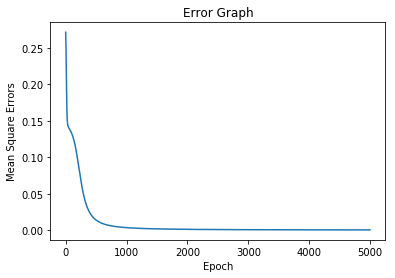

Final Mean Squared Error : 0.0003113026793373949

THE MODEL HAS BEEN TRAINED!

Input your features for testing....

1
0
1
0


[[0.99042654 0.01084646]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
import pandas as pd

excel_file = 'TestNN.xlsx'
sheet1 = pd.read_excel(excel_file,skiprows=0)

sheet2 = pd.read_excel(excel_file,sheet_name=1)

y = np.array(pd.concat([sheet2]))

X = np.array(pd.concat([sheet1]))

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))
    

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Forward Propogation
def forward_prop(X):
    
    hidden_layer_input1 = np.dot(X,wh)
    hidden_layer_input = hidden_layer_input1 + bh                   #O/P = (i/p*weight) + bias
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    
    output_layer_input1=np.dot(hiddenlayer_activations,wout)
    output_layer_input= output_layer_input1+ bout
    output = sigmoid(output_layer_input)
    
    return output,hiddenlayer_activations


#Variable initialization
epoch=5000    #Setting training iterations
lr=0.1        #Setting learning rate
inputlayer_neurons = X.shape[1] #number of features in each data set i.e., (4) 

hiddenlayer_neurons = 6 #number of hidden layers neurons
output_neurons = 2 #number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons)) #Creates a matrix of order (m x n)
bh=np.random.uniform(size=(1,hiddenlayer_neurons))                  #i.e. Creating Weight & Bias matrices
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

print("WELCOME TO THE MACHINE...\n\n\n")

print("Initial Weights:")
print(wh)

mse_list = []
i_list = []

for i in range(epoch):
    #Forward Propogation
    output,hiddenlayer_activations = forward_prop(X)


    #Backpropagation
    E = y-output
    slope_output_layer = derivatives_sigmoid(output)
    slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
    d_output = E * slope_output_layer           #Delta output
    Error_at_hidden_layer = d_output.dot(wout.T)              # Formula : error =d_output*(w_outTranspose)
    
    
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer        
    wout += hiddenlayer_activations.T.dot(d_output) *lr
    bout += np.sum(d_output, axis=0,keepdims=True) *lr          
    wh += X.T.dot(d_hiddenlayer) *lr
    bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
    
    i_list.append(i)
    
    err = np.absolute(np.array(y) - np.array(output))
    
    sum=0
    for i in range(0,3):
        for j in range(0,2):
            sum+=(err[i][j])*(err[i][j])        #Finding MSE

    mse = sum/9;
    mse_list.append(mse)
    

print('Final Weights:\n')
print(wh)

print("Output: \n"+str(output)+"\n")



for i in range(0,3):
    if(output[i][0] > 0.5):
        print("Sample "+str(i+1)+" belongs to Class - 1")
    else:
        print("Sample "+str(i+1)+" belongs to Class - 2")

print('\n\nAbsolute Errors:\n')
err = np.absolute(np.array(y) - np.array(output))
print(err)

plt.plot(i_list,mse_list)

plt.xlabel('Epoch')
plt.ylabel('Mean Square Errors')
plt.title('Error Graph')
plt.show()


sum=0
for i in range(0,3):
    for j in range(0,2):
        sum+=(err[i][j])*(err[i][j])

mse = sum/9;
print("Final Mean Squared Error : "+str(mse))
print("\nTHE MODEL HAS BEEN TRAINED!\n\nInput your features for testing....\n")

m=1
n=4
ex = [[0 for j in range(n)] for i in range(m)]  #Initialization

for i in range(0,m):
    for j in range(0,n):
        ex[i][j] = int(input())
    

output,hl = forward_prop(ex)

print("\n")
print(output)

In [26]:
import numpy as np

class NeuralNetwork():
    
    def __init__(self):
        # seeding for random number generation
        np.random.seed(1)
        
        #converting weights to a 3 by 1 matrix with values from -1 to 1 and mean of 0
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1

    def sigmoid(self, x):
        #applying the sigmoid function
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        #computing derivative to the Sigmoid function
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations):
        
        #training the model to make accurate predictions while adjusting weights continually
        for iteration in range(training_iterations):
            #siphon the training data via  the neuron
            output = self.think(training_inputs)

            #computing error rate for back-propagation
            error = training_outputs - output
            
            #performing weight adjustments
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))

            self.synaptic_weights += adjustments

    def think(self, inputs):
        #passing the inputs via the neuron to get output   
        #converting values to floats
        
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output


if __name__ == "__main__":

    #initializing the neuron class
    neural_network = NeuralNetwork()

    print("Beginning Randomly Generated Weights: ")
    print(neural_network.synaptic_weights)

    #training data consisting of 4 examples--3 input values and 1 output
    training_inputs = np.array([[0,0,1],
                                [1,1,1],
                                [1,0,1],
                                [0,1,1]])

    training_outputs = np.array([[0,1,1,0]]).T

    #training taking place
    neural_network.train(training_inputs, training_outputs, 15000)

    print("Ending Weights After Training: ")
    print(neural_network.synaptic_weights)

    user_input_one = str(input("User Input One: "))
    user_input_two = str(input("User Input Two: "))
    user_input_three = str(input("User Input Three: "))
    
    print("Considering New Situation: ", user_input_one, user_input_two, user_input_three)
    print("New Output data: ")
    print(neural_network.think(np.array([user_input_one, user_input_two, user_input_three])))
    print("Wow, we did it!")


Beginning Randomly Generated Weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Ending Weights After Training: 
[[10.08740896]
 [-0.20695366]
 [-4.83757835]]
User Input One: 1
User Input Two: 0
User Input Three: 1
Considering New Situation:  1 0 1
New Output data: 
[0.99477899]
Wow, we did it!


ModuleNotFoundError: No module named 'tflearn'